# Machine Learning and Computer Vision
## Assigment 3

---

This assignment contains 2 programming exercises.


## Problem 1: Order-statistic filtering

Order-statistic filters (OSF) are local filters that are only based on the ranking of pixel values inside a sliding window.
1. Create in imstack(img,s1,s2) function that creates a stack xstack of size n1 ×n2 ×s, which s = (2s1 +1)(2s2 +1) from the n1 ×n2 image x, such that xstack(i,j,:) contains all the values of x in the neighborhood (−s1, s1) × (−s2, s2). This function should take into account the four possible boundary conditions.

    Hint: you can use imshift, which we implemented in assignment 1, and only two loops for −s1 <= k <= s1 and −s2<= l<= s2.
    
2. Create in imosf() function
     function imosf(x, type, s1, s2) that implements order-statistic filters, returns xosf. imosf should first call imstack, next sort the entries of the stack with respect to the third dimension, and create the suitable output xosf according to the string type as follows:
     
    • 'median': select the median value,
    
    • 'erode': select the min value,
    
    • 'dilate': select the max value,
    
    • 'trimmed': take the mean after excluding at least 25% of the extreme values on each side.
    
3. Create in imopening() and imclosing() function that performs the opening and closing by the means of OSF filters.
    <img src="markdown/fig1.png">

4. Load castle.png. Write a script to test imosf() that loads the image x = castle and create a corrupted version of image x with 10% of impulse noise (salt and pepper)

Apply your OSF filters and zoom on the results to check that your results are consistent with the following ones:
    <img src="markdown/fig2.png">


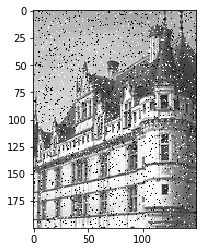

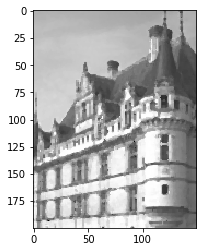

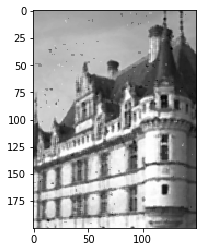

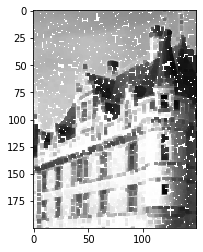

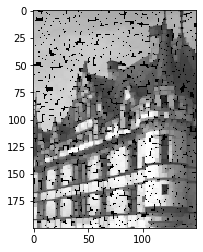

In [2]:
import numpy as np
from imageio import imread
import matplotlib.pyplot as plt
#Function
def PepperandSalt(img,percetage):
    NoiseImg=img.copy()
    NoiseNum=int(percetage*img.shape[0]*img.shape[1])
    for i in range(NoiseNum):
        randX = np.random.randint(0, img.shape[0])
        randY = np.random.randint(0, img.shape[1])
        if np.random.random() <=0.5:
            NoiseImg[randX,randY]=0
        else:
            NoiseImg[randX,randY]=255          
    return NoiseImg
def imshift2(x, k, l):
    m, n = x.shape
    xshifted = x.copy()
    k %= m
    l %= n
    if k != 0 and l != 0:
        xshifted[:(m-k)%m, :(n-l)%n] = x[k%m:, l%n:]
        xshifted[(m-k)%m:, (n-l)%n:] = x[:k%m, :l%n]
        xshifted[(m-k)%m:, :(n-l)%n] = x[:k%m, l%n:]
        xshifted[:(m-k)%m, (n-l)%n:] = x[k%m:, :l%n]
    elif k == 0 and l != 0:
        xshifted[:, :(n-l)%n] = x[:, l%n:]
        xshifted[:, (n-l)%n:] = x[:, :l%n]
    elif k != 0 and l == 0:
        xshifted[:(m-k)%m, :] = x[k%m:, :]
        xshifted[(m-k)%m:, :] = x[:k%m, :]
    return xshifted

def osf(img, s1, s2):
    m, n = img.shape
    # print(m,n)
    s = (2*s1+1)*(2*s2+1)
    xstack = np.zeros((m, n, s))
    k = 0
    for i in range(-s1, s1+1):
        for j in range(-s2, s2+1):
            xstack[:, :, k] = imshift2(img, i, j)
            k += 1
    return xstack

def imosf(x, type, s1, s2):
    m, n = x.shape
    xosf = x.copy()
    s = osf(x, s1, s2)
    h = s.shape[2]
    if type == 'median':
        for i in range(m):
            for j in range(n):
                xosf[i, j] = np.median(s[i, j, :])
    elif type == 'erode':
        for i in range(m):
            for j in range(n):
                xosf[i, j] = np.min(s[i, j, :])
    elif type == 'dilate':
        for i in range(m):
            for j in range(n):
                xosf[i, j] = np.max(s[i, j, :])
    elif type == 'trimmed':
        for i in range(m):
            for j in range(n):
                ss = np.sort(s[i, j, :])
                xosf[i, j] = np.mean(ss[h//4 : 3*h//4+1])
    return xosf

def imopening(img, s1, s2):
    ret = imosf(img, 'erode', s1, s2)
    ret = imosf(ret, 'dilate', s1, s2)
    return ret
def imclosing(img, s1, s2):
    ret = imosf(img, 'dilate', s1, s2)
    ret = imosf(ret, 'erode', s1, s2)
    return ret
#Import image here
# Sample call
# castle.png
m, n = 1,1
img = imread('castle.png')
im = PepperandSalt(img, 0.1)
immedian = imosf(im, 'median', m, n)
immean = imosf(im, 'trimmed', m, n)
# imclose = imosf(im, 'erode', m, n)
# imopen = imosf(im, 'dilate', m, n)
imclose = imclosing(im, m, n)
imopen = imopening(im, m, n)

plt.figure()
plt.imshow(im[50:250, 50:200], cmap='gray')
plt.figure()
plt.imshow(immedian[50:250, 50:200], cmap='gray')
plt.figure()
plt.imshow(immean[50:250, 50:200], cmap='gray')
plt.figure()
plt.imshow(imclose[50:250, 50:200], cmap='gray')
plt.figure()
plt.imshow(imopen[50:250, 50:200], cmap='gray')

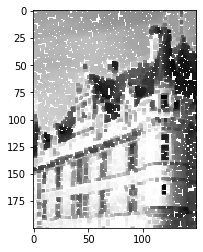

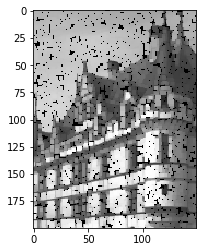

In [12]:
# test.py
import numpy as np
from imageio import imread
import matplotlib.pyplot as plt
from cv2 import cv2
#Function

def PepperandSalt(img,percetage):
    NoiseImg=img.copy()
    NoiseNum=int(percetage*img.shape[0]*img.shape[1])
    for i in range(NoiseNum):
        randX = np.random.randint(0, img.shape[0])
        randY = np.random.randint(0, img.shape[1])
        if np.random.random() <=0.5:
            NoiseImg[randX,randY]=0
        else:
            NoiseImg[randX,randY]=255          
    return NoiseImg

#Import image here
# Sample call
# castle.png
m, n = 3, 3
img = imread('castle.png')
im = PepperandSalt(img, 0.1)
# imclose = inclosing(im, m, n)
# imopen = imopening(im, m, n)

kernel = np.ones((m, n), np.uint8)
imclose = cv2.morphologyEx(im, cv2.MORPH_CLOSE, kernel)
imopen = cv2.morphologyEx(im, cv2.MORPH_OPEN, kernel)

plt.figure()
plt.imshow(imclose[50:250, 50:200], cmap='gray')
plt.figure()
plt.imshow(imopen[50:250, 50:200], cmap='gray')
plt.show()

## Problem 2: Bilateral filter

Now, we will discuss a non-local filter, Bilateral filter.

The bilateral filter is a denoising algorithm that reads as:
    <img src="markdown/fig3.png">

1. Create a test_imbilateral(img, sigma) function that loads the image x = castle and adds additive white Gaussian noise of standard deviation σ = 10

2. Create in imbilateral_naive(img, sigma, s1, s2, h), a function that implements the bilateral filter (except around boundaries) with four loops.

3. test your function on y with s1 = s2 = 10 and h = 1. Zoom on the results to check that your functions are consistent with the following ones:
    <img src="markdown/fig4.png">

4. Create function imbilateral(y, sigma, s1, s2, h)that implements the bilateral filter including around boundaries. The idea is again to switch the k, l loops with the i, j loops, and then make use of imshift. The final code should read with only two loops and deal with boundary conditions.

5. Compare the computation times.

6. Increase the noise level, and play with the search window sizes s1 and s2 and filtering parameter h.

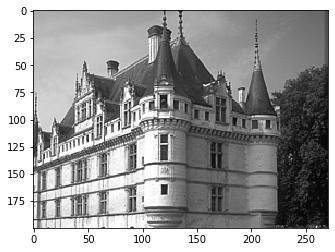

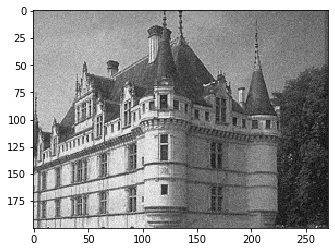

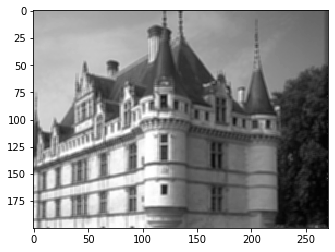

In [9]:
import imageio
import numpy as np
import matplotlib.pyplot as plt

#Function
def test_imbilateral(img, sigma):
    m, n = img.shape
    NoiseImg = img + sigma * np.random.randn(m, n)
    return NoiseImg
#note: noise can be generated using 
# noise: sigma*np.random.randn(n1,n2)
def fi(a, sigma, h):
    return np.exp(-(max(a-2*sigma*sigma, 0))/(16*h*sigma*sigma))

def imbilateral_naive(img, sigma, s1, s2, h):
    m, n = img.shape
    imbilateral = img.copy()
    for i in range(s1, m-s1):
        for j in range(s2, n-s2):
            sum1, sum2 = 0, 0
            for k in range(-s1, s1+1):
                for l in range(-s2, s2+1):
                    sum1 += fi(img[i+k, j+l]-img[i, j]**2, sigma, h) * img[i+k, j+l]
                    sum2 += fi(img[i+k, j+l]-img[i, j]**2, sigma, h)
            imbilateral[i, j] = sum1/sum2
    return imbilateral
#Import image here
# Sample call
# castle.png
m, n = 1,1
im = imread('castle.png')
noise = test_imbilateral(img, 10)
imb = imbilateral_naive(img, 10, m, n, 1)

plt.figure()
plt.imshow(im[50:250, 50:], cmap='gray')
plt.figure()
plt.imshow(noise[50:250, 50:], cmap='gray')
plt.figure()
plt.imshow(imb[50:250, 50:], cmap='gray')

## Conclusion

Have you accomplished all parts of your assignment? What concepts did you used or learned in this assignment? What difficulties have you encountered? Explain your result for each section. Please wirte one or two short paragraph in the below Markdown window (double click to edit).

**** Your Conclusion: ****

Problem 1: 
There are 7 images showed in problem 1. The first 5 images are results of image with pepper and salt noise, osf median, osf trimmed mean, closing, and opening. And the next 2 images are closing and opening images as the confirmation.

I found there may be a mistake in the examples. For the last two images, (e) should be opening and (d) should be closing. I used opencv to confirm my results and I pasted the cv2 code in problem 1. Problem 1 was completed with the help of imshift function which was created in assignment 2. But, I found that I miss considering 0s in imshift and I created a new matrix with np.zeros() function and both of these caused mistakes in creating imosf function. 


Problem 2: 
Three images are showed. The first is the origin, the second is added with gaussian noise, and the last is result of bilateral filter. It looks blurry but the noise is filtered successfully. 

It takes a lot of time for the programs to give the result images, especially problem 1. I wonder it is because I am not using effective methods to create those functions. And the images showed are not large enough, so I quit using subplot and slicing images to show more details. 
The results are not perfectly the same as the examples given above. Since the size of windows are not given in examples, I don't know exactly why there are some differences between the examples and my results. For example, in problem2, the third image seems less clear than that in example.

I have checked your results, and all results are correct.
For your problem 1, since we used the image stack function already, the purpose for using this method, it is to simplify the algorithm.
You do not have to loop over the entire image again to look for min/max or median value,

You can simply sort the stacked matrix along the third axis,
 sort_xstack = np.sort(xstack, axis=2)

Then directly get median value, min, max value from there.
For example:

In [ ]:
if type == 'median':
        #stack = xstack[i, j, :]
        xosf = sort_xstack[:,:,round(length/2)]
    elif type == 'erode':
        xosf = sort_xstack[:, :, 0]
    elif type == 'dilate':
        xosf = sort_xstack[:, :, length-1]

For your problem 2, the result is correct. In fact for this problem, it is similar to do the convolution in assignment 3, not without the static kernel and using active kernel instead. 
You can use the same spatial method as you used in problem 1 to speed up the program.
For example:

In [ ]:
def imbilateral(y, sig, s1, s2, h):
    (n1,n2)=y.shape
    Z = np.zeros((n1,n2))
    X = np.zeros((n1,n2))
    zero =  np.zeros((n1,n2))
    phi = lambda a: np.exp(-np.maximum.reduce([a-2*sig**2,zero])/((16*h*sig**2)))
    for k in range(-s1,s2+1):
        for l in range(-s2,s2+1):
            yshifted = imshift(y, k, l)
            dist2 = (yshifted - y)**2
            Z = Z + phi(dist2)
            X = X + phi(dist2)*yshifted
    X = X/Z
    X[Z==0] = 0
    return X

---
** Submission Instructions**  
Remember to submit you pdf version of this notebook to Gradescope. You can find the export option at File $\rightarrow$ Download as $\rightarrow$ PDF via LaTeX